In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import charset_normalizer as ch
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data-analysis/time_dim.csv
/kaggle/input/ecommerce-data-analysis/fact_table.csv
/kaggle/input/ecommerce-data-analysis/Trans_dim.csv
/kaggle/input/ecommerce-data-analysis/item_dim.csv
/kaggle/input/ecommerce-data-analysis/store_dim.csv
/kaggle/input/ecommerce-data-analysis/customer_dim.csv


In [ ]:
trans = pd.read_csv('/kaggle/input/ecommerce-data-analysis/Trans_dim.csv')
customer = pd.read_csv('/kaggle/input/ecommerce-data-analysis/customer_dim.csv', encoding='windows-1250')
fact = pd.read_csv('/kaggle/input/ecommerce-data-analysis/fact_table.csv', encoding='windows-1250')
item = pd.read_csv('/kaggle/input/ecommerce-data-analysis/item_dim.csv', encoding='windows-1250')
store = pd.read_csv('/kaggle/input/ecommerce-data-analysis/store_dim.csv', encoding='windows-1250')
time = pd.read_csv('/kaggle/input/ecommerce-data-analysis/time_dim.csv', encoding='windows-1250')

In [ ]:
with open('/kaggle/input/ecommerce-data-analysis/customer_dim.csv','rb') as customer_dim:
    re = ch.detect(customer_dim.read(1000000))
    print(re)

{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


In [ ]:
trans.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [ ]:
customer.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [ ]:
fact.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [ ]:
fact.rename(columns={'coustomer_key':'customer_key'}, inplace=True)

In [ ]:
item.head()

In [ ]:
store.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [ ]:
time.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [ ]:
trans.dtypes

payment_key    object
trans_type     object
bank_name      object
dtype: object

In [ ]:
customer.dtypes

coustomer_key    object
name             object
contact_no        int64
nid               int64
dtype: object

In [ ]:
customer.rename(columns={'coustomer_key':'customer_key'}, inplace=True)

In [ ]:
fact.dtypes

payment_key      object
customer_key     object
time_key         object
item_key         object
store_key        object
quantity          int64
unit             object
unit_price      float64
total_price     float64
dtype: object

In [ ]:
item.dtypes

item_key        object
item_name       object
desc            object
unit_price     float64
man_country     object
supplier        object
unit            object
dtype: object

In [ ]:
store.dtypes

store_key    object
division     object
district     object
upazila      object
dtype: object

In [ ]:
time.dtypes

time_key    object
date        object
hour         int64
day          int64
week        object
month        int64
quarter     object
year         int64
dtype: object

In [ ]:
fact.duplicated().sum()

0

## Top 5 Paying Customers

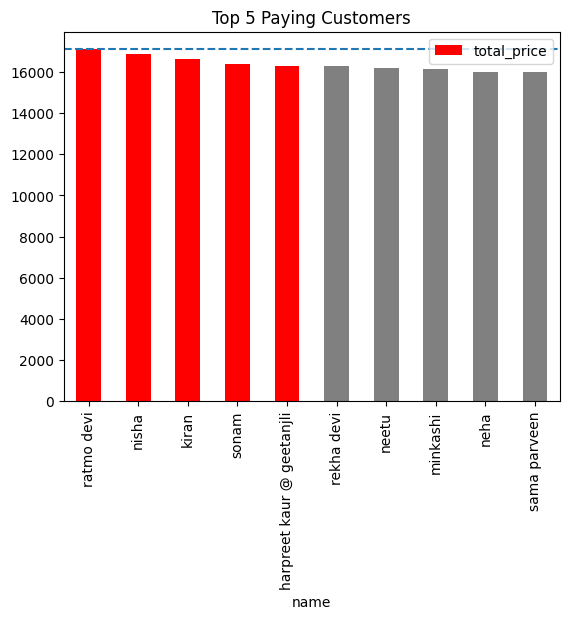

In [ ]:
colors = ['red' for i in range(5)]
colors =colors+['grey' for i in range(5)]
customer_fact = customer.merge(fact, on='customer_key')
customer_fact.groupby(['customer_key','name'])['total_price'].sum().sort_values(ascending=False).iloc[:10].reset_index()[['name','total_price']].plot(kind='bar',x='name',y='total_price',color=colors)
plt.title('Top 5 Paying Customers')
plt.xticks(rotation=90)
maxx = customer_fact.groupby(['customer_key'])['total_price'].sum().max()
plt.axhline(maxx, linestyle='dashed')

In [ ]:
print('The best customer is Ratmo Devi with ${} paid'.format(maxx))

The best customer is Ratmo Devi with $17104.5 paid


In [ ]:
time.date = pd.to_datetime(time.date)

/tmp/ipykernel_42/1035773063.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time.date = pd.to_datetime(time.date)


In [ ]:
time_fact = time.merge(fact, on='time_key')

Text(0.5, 1.0, 'Total Price per year')

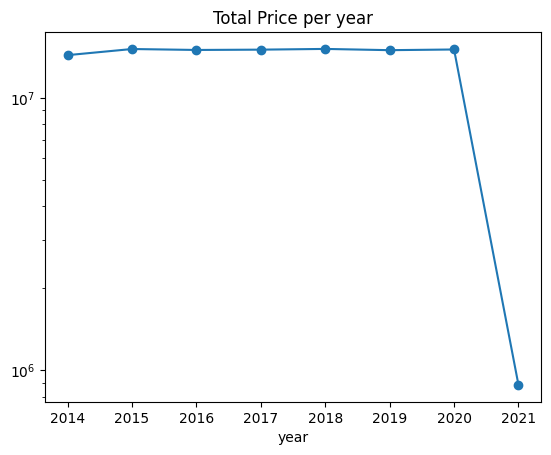

In [ ]:
ax = time_fact.groupby('year')['total_price'].sum().plot(marker='o')
ax.set_yscale('log')
plt.title('Total Price per year')

Steady Sales from 2014 to 2020; clear drop from 2020 to 2021. This can be due to not having much data from 2021 in the dataset; further analysis is required.

Text(0.5, 1.0, 'There is a steady max total price per year')

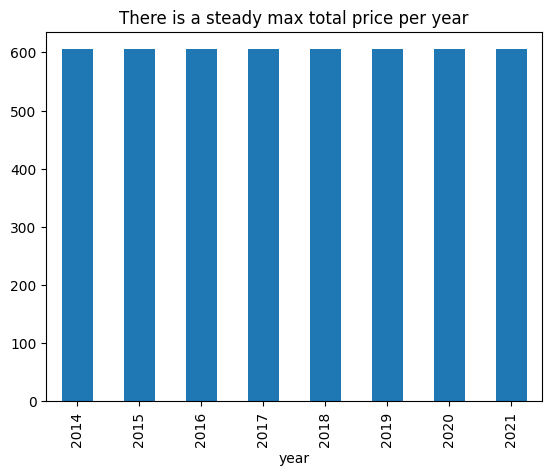

In [ ]:
time_fact.groupby('year')['total_price'].max().plot(kind='bar')
plt.title('There is a steady max total price per year')

Text(0.5, 1.0, 'The Year 2021 doesnt have many records')

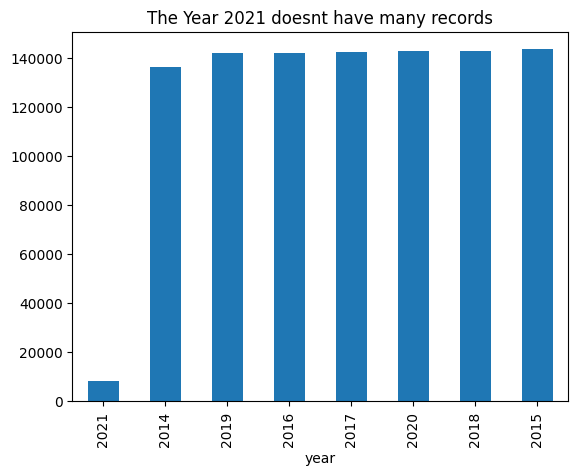

In [ ]:
time_fact.groupby('year').size().sort_values().plot(kind='bar')
plt.title('The Year 2021 doesnt have many records')

Text(0.5, 1.0, 'Total Price per Quarter from lowest to highest')

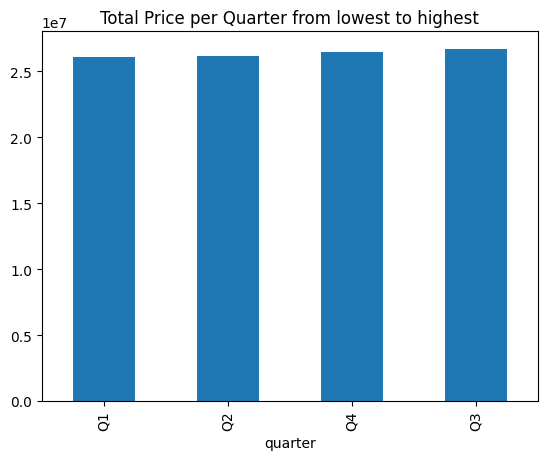

In [ ]:
ax=time_fact.groupby('quarter')['total_price'].sum().sort_values().plot(kind='bar')
plt.title('Total Price per Quarter from lowest to highest')

Text(0.5, 1.0, 'Total Price per week from lowest to highest')

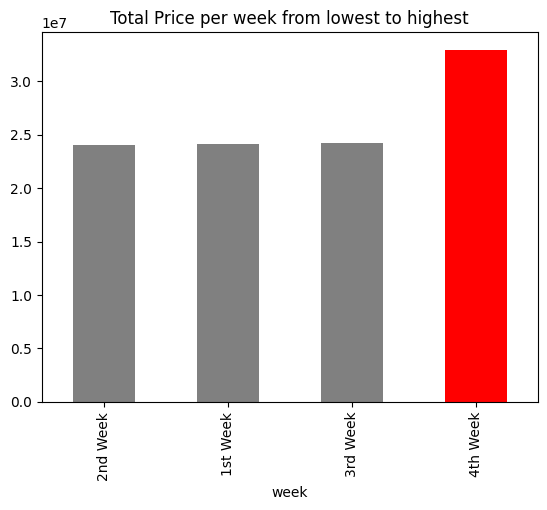

In [ ]:
ax=time_fact.groupby('week')['total_price'].sum().sort_values().plot(kind='bar', color=['grey','grey','grey','red'])
plt.title('Total Price per week from lowest to highest')


The fourth week of each month has the most sales recorded.

<Axes: xlabel='month'>

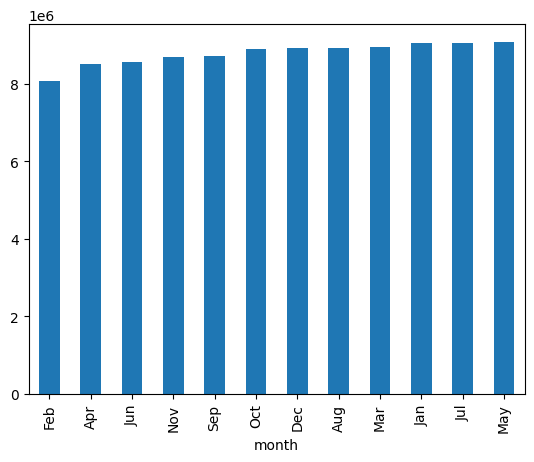

In [ ]:

mappings = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
time_fact['month'] = time_fact['month'].map(mappings)
time_fact.groupby('month')['total_price'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='month'>

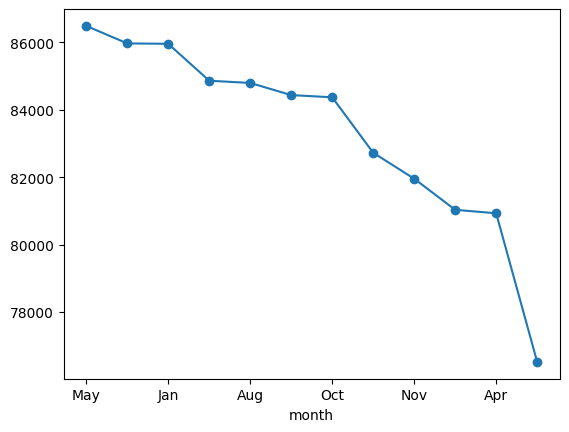

In [ ]:
time_fact.month.value_counts(ascending=False).plot(marker='o')


May has the most sales recorded.

In [ ]:
trans_fact = trans.merge(fact, on='payment_key')

In [ ]:
trans_fact.columns

Index(['payment_key', 'trans_type', 'bank_name', 'customer_key', 'time_key',
       'item_key', 'store_key', 'quantity', 'unit', 'unit_price',
       'total_price'],
      dtype='object')

Text(0, 0.5, 'Total Sales')

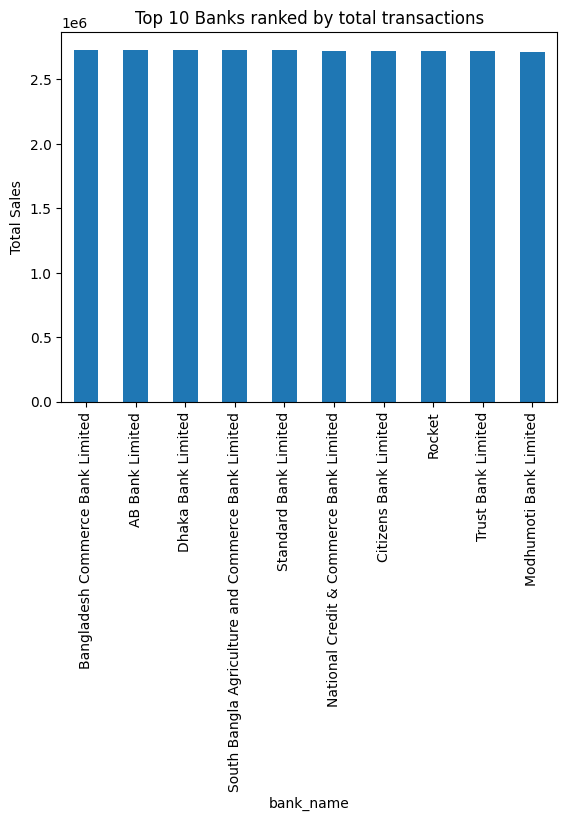

In [ ]:
trans_fact.groupby('bank_name')['total_price'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar')
plt.title('Top 10 Banks ranked by total transactions')
plt.ylabel('Total Sales')

Text(0.5, 0, 'Price per Order')

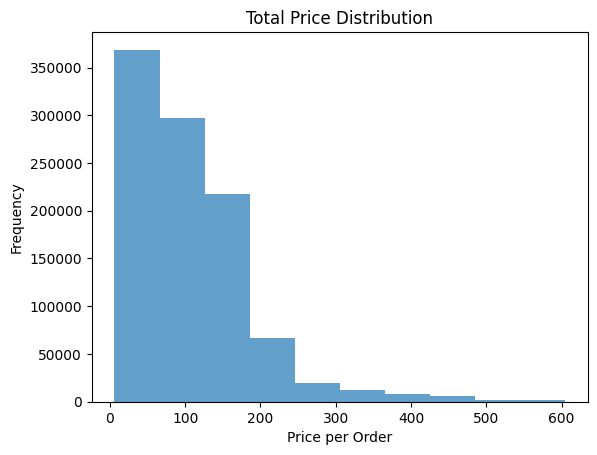

In [ ]:
ax=trans_fact.total_price.plot(kind='hist', alpha=.7)
plt.title('Total Price Distribution')
plt.xlabel('Price per Order')

there is a positively skewed distribution of the Total Price per order.

In [ ]:
trans_fact.trans_type.value_counts()

trans_type
card      897319
mobile     77091
cash       25590
Name: count, dtype: int64

In [ ]:
store_fact =store.merge(fact, on='store_key')

In [ ]:
store_fact.division.value_counts()

division
DHAKA         386888
CHITTAGONG    187340
RAJSHAHI      115075
KHULNA        107164
RANGPUR        79926
BARISAL        71444
SYLHET         52163
Name: count, dtype: int64

In [ ]:
store_fact.division.value_counts()

division
DHAKA         386888
CHITTAGONG    187340
RAJSHAHI      115075
KHULNA        107164
RANGPUR        79926
BARISAL        71444
SYLHET         52163
Name: count, dtype: int64

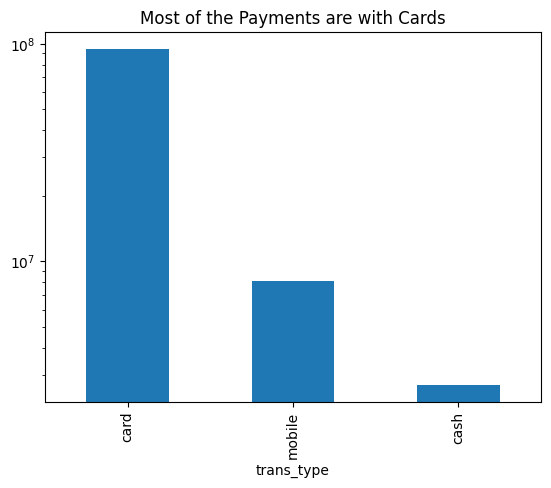

In [ ]:
ax = trans_fact.groupby('trans_type')['total_price'].sum().sort_values(ascending=False).plot(kind='bar',title='Most of the Payments are with Cards')
ax.set_yscale('log')

Text(0.5, 1.0, 'Ranking Division by Total Price')

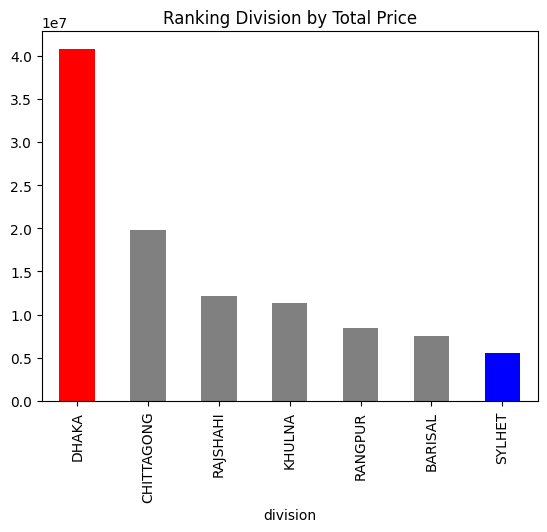

In [ ]:
store_fact.groupby('division')['total_price'].sum().sort_values(ascending=False).plot(kind='bar', color = ['red']+['grey']*5+['blue'])
plt.title('Ranking Division by Total Price')

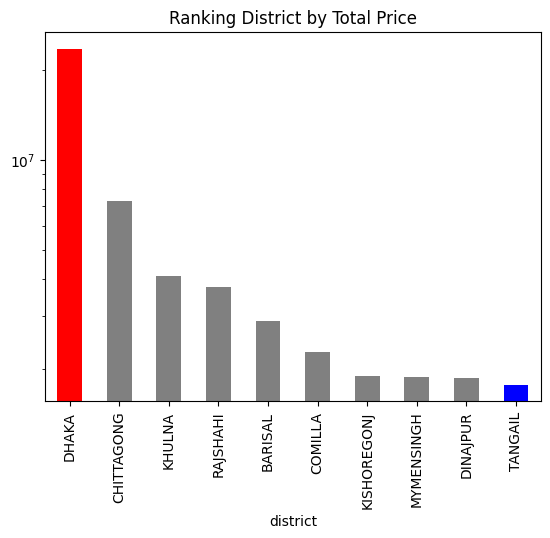

In [ ]:
ax=store_fact.groupby('district')['total_price'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar',color=['red']+['grey']*8+['blue'])
plt.title('Ranking District by Total Price')
ax.set_yscale('log')

<Axes: title={'center': 'Ranking Quarters (from 2014-2021) by Total Price per Order'}, ylabel='year,quarter'>

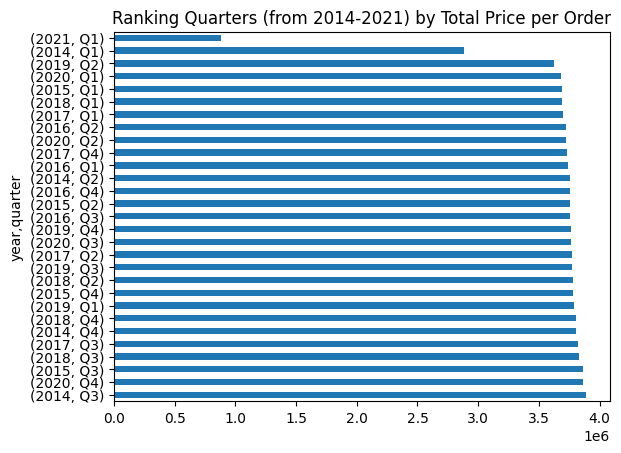

In [ ]:
time_fact.groupby(['year','quarter'])['total_price'].sum().sort_values(ascending=False).plot(kind='barh',title='Ranking Quarters (from 2014-2021) by Total Price per Order')

In [ ]:
q1 = time_fact.loc[time_fact.quarter=='Q1']
q2 = time_fact.loc[time_fact.quarter=='Q2']
q3 = time_fact.loc[time_fact.quarter=='Q3']
q4 = time_fact.loc[time_fact.quarter=='Q4']


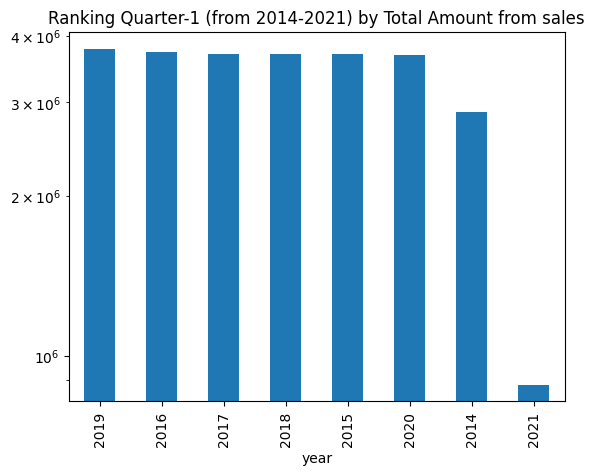

In [ ]:
ax = q1.groupby(['year'])['total_price'].sum().sort_values(ascending=False).plot(kind='bar',title='Ranking Quarter-1 (from 2014-2021) by Total Amount from sales')
ax.set_yscale('log')

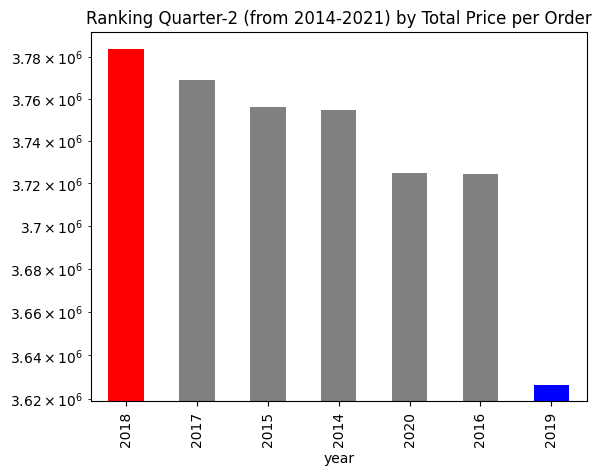

In [ ]:
ax = q2.groupby(['year'])['total_price'].sum().sort_values(ascending=False).plot(kind='bar',title='Ranking Quarter-2 (from 2014-2021) by Total Amount from sales', color=['red']+['grey']*5+['blue'])
ax.set_yscale('log')

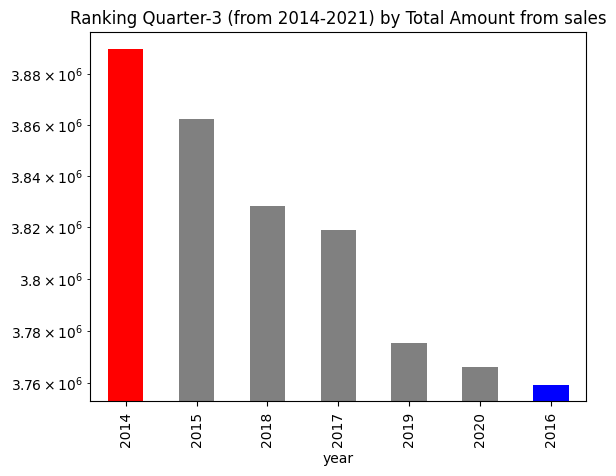

In [ ]:
ax = q3.groupby(['year'])['total_price'].sum().sort_values(ascending=False).plot(kind='bar',color=['red']+['grey']*5+['blue'],title='Ranking Quarter-3 (from 2014-2021) by Total Amount from sales')
ax.set_yscale('log')

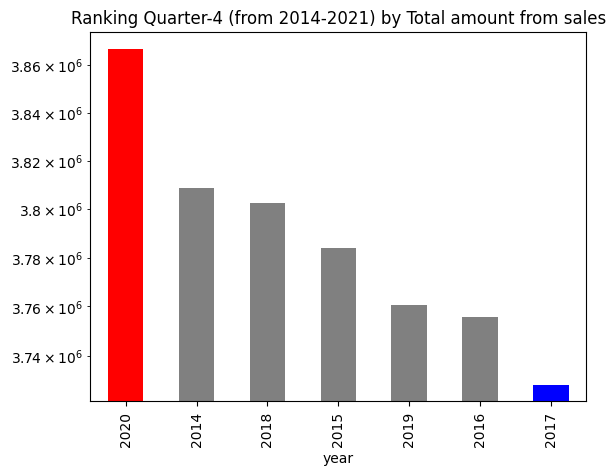

In [ ]:
ax=q4.groupby(['year'])['total_price'].sum().sort_values(ascending=False).plot(kind='bar',color = ['red']+['grey']*5+['blue'],title='Ranking Quarter-4 (from 2014-2021) by Total amount from sales')
ax.set_yscale('log')